# TUGAS BENGKOD 6 Oktober 2025
## Nama : Laurentius Joandanu
## NIM    : A11.2022.14179


### Import Libary
code dibawah untuk import libary yang digunakan

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

### Mount Drive
Fungsi code dibawah ini untuk mengambil data dari drive

In [51]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Definisikan Kolom
Fungsi code dibawah ini untuk memberi nama / definisi tiap tiap kolom / fitur
*   Age ( Umur )
*   Workclass ( Status Pekerjaan )
*   Fnlwgt ( Bobot akhir sensus yang menunjukkan berapa banyak orang di populasi yang diwakili oleh responden ini )
*   Education ( Pendidkan yang dicapai )
*   Education-num ( Pendidikan versi numerik )
*   Marital-status ( Status pernikahan )
*   Occupation ( Jenis pekerjaan utaama yang dilakukan )
*   Relationship ( Hubungan individu sebagai kepala keluarga )
*   Race ( Kategori ras individu )
*   Sex ( Jenis kelamin )
*   Capital-gain ( Jumlah keuntungan dalam setahun )
*   Capital-loss ( Jumlah kerugian dalam setahun )
*   Hours-per-week ( Jam kerja per minggu )
*   Native-country ( Negara asal )
*   Income ( Label target antara <=50K dan >50K )










In [52]:
# Definisikan nama kolom sesuai dokumentasi UCI
column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

### Cek Dataset
Fungsi code dibawah ini untuk membaca data 10 baris

In [53]:
# Cek Dataset
df = pd.read_csv('/content/drive/My Drive/Bengkel Koding/census+income/adult.data',header=None,names=column_names,na_values="?",skipinitialspace=True )

# Baca dataset
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


### Cek Tipedata
Fungsi code dibawah ini untuk mengecek tipedata tiap fitur / kolom apakah integer, float, object

In [54]:
# Cek Tipedata Tiap Fitur
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Memeriksa statistik
Fungsi code dibawah ini untuk meringkas data tersebut dari count, mean, std, min, 25%, 50%, 75%, max

In [55]:
# Memeriksa ringkasan statistik
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Cek Missing Value
Fungsi code dibawah ini untuk mengecek apakah data tersebut ada missing value dan setelah di cek data tersebut ada missing valuenya di fitur workclass, occupation, native-country

In [56]:
# Cek missing value
df.isnull().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,1843
relationship,0
race,0
sex,0


### Cek Duplikat
Fungsi code dibawah ini untuk mengecek apakah data tersebut ada data duplikat dan setelah dijalankan data tersebut memiliki sejumlah 24 data yang sama

In [57]:
# Cek duplikat
df.duplicated().sum()

np.int64(24)

### Cek Outlier
Fungsi diabawah untuk mengecek outlier dan di visualisasikan

/tmp/ipython-input-29683956.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


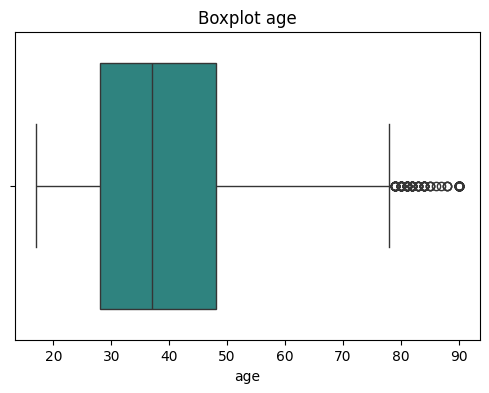

/tmp/ipython-input-29683956.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


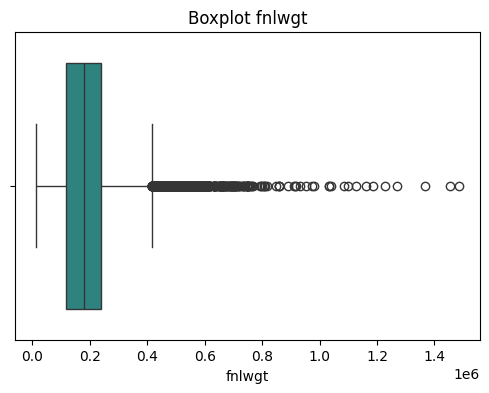

/tmp/ipython-input-29683956.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


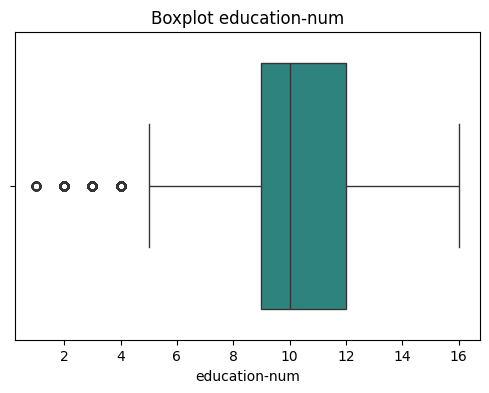

/tmp/ipython-input-29683956.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


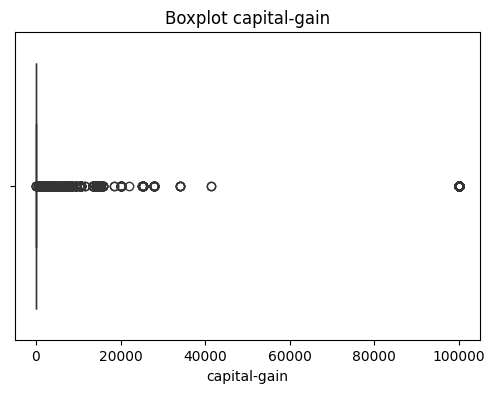

/tmp/ipython-input-29683956.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


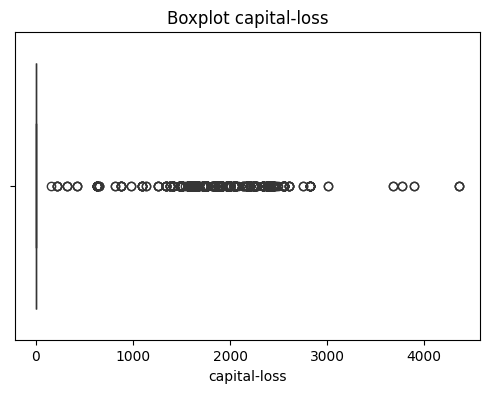

/tmp/ipython-input-29683956.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


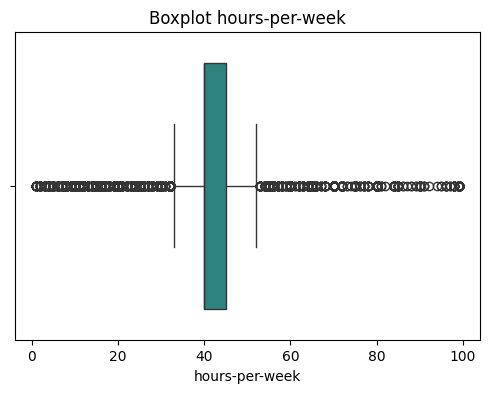

In [58]:
# Cek outlier
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Untuk visualisasi outlier
for col in num_cols:
  plt.figure(figsize=(6,4))
  sns.boxplot(data=df, x=col, palette='viridis')
  plt.title(f'Boxplot {col}')
  plt.xlabel(col)
  plt.show()

### Cek Imbalance
Fungsi code dibawah untuk mengecek data tersebut balance atau imbalance dan visualisasinya

/tmp/ipython-input-566194455.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='income', palette='viridis')


Text(0, 0.5, 'Count')

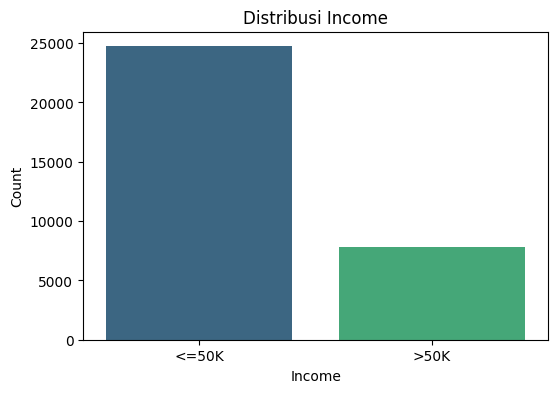

In [59]:
# Cek Imbalance Data
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='income', palette='viridis')
plt.title('Distribusi Income')
plt.xlabel('Income')
plt.ylabel('Count')

### Handling Missing Value
Fungsi code dibawah ini untuk handling missing value dengan menghapus data yang kosong dan dicek kembali apakah data tersebut masih ada data yang kosong

In [60]:
# Hapus semua baris yang mengandung NaN pada dataset
data_cleaned = df.dropna()

# Mengecek data setelah penghapusan NaN
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Encode Data
Encode data menggunakan LabelEncoder, Langkah ini dilakukan agar seluruh kolom di dataset memiliki nilai numerik,
karena sebagian besar model Machine Learning di scikit-learn (seperti Decision Tree, Logistic Regression, Random Forest, dll) tidak bisa memproses data dalam bentuk teks langsung.

In [61]:
# Encode data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

### Split Data
Langkah ini bertujuan untuk:

*   Memisahkan fitur dan label, supaya model tahu mana variabel masukan dan mana target yang harus diprediksi.
* Membagi data menjadi train dan test set, agar performa model bisa dievaluasi secara obyektif (tidak hanya diukur pada data yang sama dengan data latih).

In [62]:
# Fitur
X = df.drop(["income"], axis=1)
# Label
y = df["income"]

# Split data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Distribusi Label Target
Langkah ini bertujuan untuk Mengetahui seberapa seimbang (balanced) data target pada data latih.

income
0    19778
1     6270
Name: count, dtype: int64
income
0    0.759291
1    0.240709
Name: proportion, dtype: float64


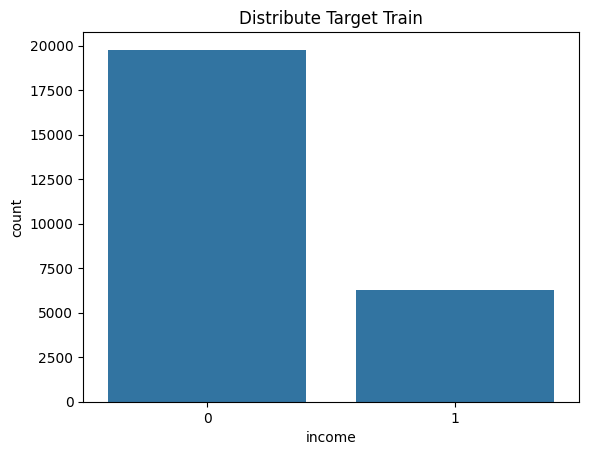

In [63]:
# Distribusi Label Target
print(y_train.value_counts())

print(y_train.value_counts(normalize=True))
sns.countplot(x=y_train)
plt.title("Distribute Target Train")
plt.show()

### Decission Tree
Kode ini bertujuan untuk:
* Membangun model klasifikasi menggunakan algoritma Decision Tree berdasarkan dataset Census Income.
* Melatih model dengan data latih (X_train, y_train) agar mampu mempelajari hubungan antara fitur (seperti usia, pendidikan, pekerjaan, dll) dengan target (income).
* Menguji performa model pada data uji (X_test, y_test) dan menilai hasilnya melalui metrik akurasi, presisi, recall, F1-score, serta confusion matrix.

===== Evaluasi Model: Decision Tree =====
Akurasi : 0.8148318747121143
Presisi : 0.8170692531592988
Recall  : 0.8148318747121143
F1 Score: 0.8158875860178701

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      4942
           1       0.61      0.63      0.62      1571

    accuracy                           0.81      6513
   macro avg       0.75      0.75      0.75      6513
weighted avg       0.82      0.81      0.82      6513



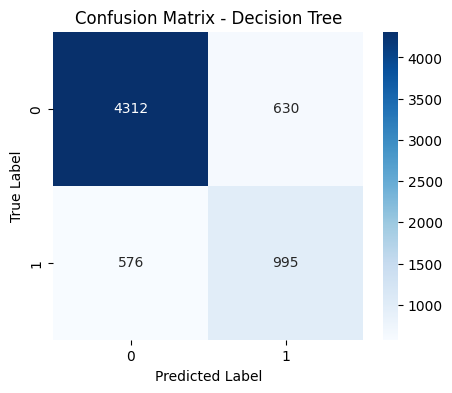

In [64]:
# Decission Tree
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

y_pred_dt = model_dt.predict(X_test)

print("===== Evaluasi Model: Decision Tree =====")
print("Akurasi :", accuracy_score(y_test, y_pred_dt))
print("Presisi :", precision_score(y_test, y_pred_dt, average='weighted'))
print("Recall  :", recall_score(y_test, y_pred_dt, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_dt, average='weighted'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Penjelasan Hasil :

* Akurasi → menunjukkan persentase prediksi model yang benar terhadap seluruh data uji.
akurasi 0.81, berarti 81% prediksi model sesuai dengan data sebenarnya.

* Presisi (Precision) → menggambarkan seberapa banyak prediksi “berpenghasilan >50K” yang benar dari semua prediksi positif model.
Presisi tinggi berarti model jarang salah mengira orang berpenghasilan rendah sebagai tinggi.

* Recall → menunjukkan seberapa banyak kasus “>50K” yang berhasil ditemukan model dari seluruh orang yang memang berpenghasilan >50K.
Jika recall rendah, berarti masih banyak orang berpenghasilan tinggi yang tidak terdeteksi.

* F1-Score → nilai gabungan dari presisi dan recall; semakin tinggi berarti keseimbangan performa model semakin baik.

* Classification Report → menampilkan keempat metrik di atas untuk masing-masing kelas (<=50K dan >50K).
Biasanya pada dataset ini, kelas <=50K (mayoritas) punya nilai presisi dan recall lebih tinggi dibanding >50K (minoritas).

* Confusion Matrix → memperlihatkan jumlah prediksi benar dan salah untuk tiap kelas:
Diagonal utama (kiri atas & kanan bawah) menunjukkan prediksi benar.
Nilai di luar diagonal menunjukkan kesalahan model (misalnya orang berpenghasilan >50K dikira <=50K).

### Logistic Regression
Kode ini bertujuan untuk:

* Membangun model klasifikasi Logistic Regression untuk memprediksi apakah seseorang memiliki penghasilan lebih dari $50K atau tidak berdasarkan fitur demografis dari dataset Census Income.
* Menstandarkan (menormalisasi) skala fitur dengan StandardScaler, agar semua variabel memiliki rentang nilai yang seimbang dan mempercepat proses konvergensi model.
* Melatih model pada data latih (X_train_scale, y_train) dan menguji performa pada data uji (X_test_scale, y_test).
* Mengevaluasi hasil model berdasarkan metrik akurasi, presisi, recall, F1-score, dan confusion matrix.

===== Evaluasi Model: Logistic Regression =====
Akurasi : 0.8257331490864425
Presisi : 0.8144977185296264
Recall  : 0.8257331490864425
F1 Score: 0.8118043361728122

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4942
           1       0.71      0.46      0.56      1571

    accuracy                           0.83      6513
   macro avg       0.78      0.70      0.73      6513
weighted avg       0.81      0.83      0.81      6513



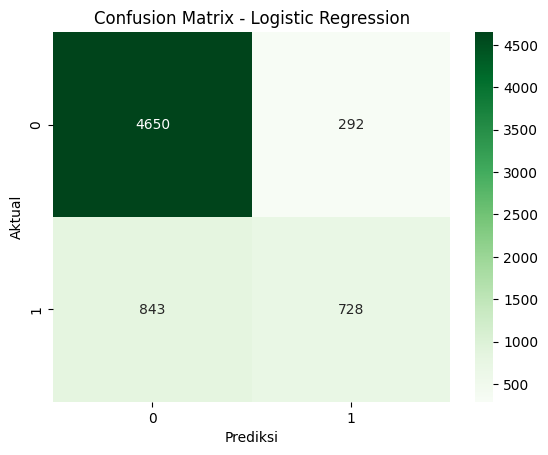

In [69]:
# Logistic Regression
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scale, y_train)

y_pred_lr = lr_model.predict(X_test_scale)

print("===== Evaluasi Model: Logistic Regression =====")
print("Akurasi :", accuracy_score(y_test, y_pred_lr))
print("Presisi :", precision_score(y_test, y_pred_lr, average='weighted'))
print("Recall  :", recall_score(y_test, y_pred_lr, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_lr, average='weighted'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

Penjelasan Hasil :

* Akurasi → menunjukkan persentase prediksi model yang benar terhadap seluruh data uji.
akurasi 0.82, berarti 82% prediksi model sesuai dengan data sebenarnya.
Model ini lebih tinggi akurasinya dibanding model Decission Tree

* Presisi (Precision) → menggambarkan seberapa banyak prediksi “berpenghasilan >50K” yang benar dari semua prediksi positif model.
Presisi tinggi berarti model jarang salah mengira orang berpenghasilan rendah sebagai tinggi.

* Recall → menunjukkan seberapa banyak kasus “>50K” yang berhasil ditemukan model dari seluruh orang yang memang berpenghasilan >50K.
Jika recall rendah, berarti masih banyak orang berpenghasilan tinggi yang tidak terdeteksi.

* F1-Score → nilai gabungan dari presisi dan recall; semakin tinggi berarti keseimbangan performa model semakin baik.

* Classification Report → menampilkan keempat metrik di atas untuk masing-masing kelas (<=50K dan >50K).
Biasanya pada dataset ini, kelas <=50K (mayoritas) punya nilai presisi dan recall lebih tinggi dibanding >50K (minoritas).

* Confusion Matrix → memperlihatkan jumlah prediksi benar dan salah untuk tiap kelas:
Diagonal utama (kiri atas & kanan bawah) menunjukkan prediksi benar.
Nilai di luar diagonal menunjukkan kesalahan model (misalnya orang berpenghasilan >50K dikira <=50K).

### Perbandingan
Analisis Perbandingan

* Akurasi & Recall
Logistic Regression menunjukkan nilai akurasi tertinggi (82.57%) dan recall yang juga lebih baik daripada Decision Tree (82.57% vs 81.48%).
Ini berarti model Logistic Regression lebih konsisten dalam mengenali seluruh data dengan benar, termasuk sebagian besar data dari kelas minoritas (>50K).

* Presisi & F1-Score
Decision Tree unggul sedikit dalam presisi (81.70%) dan F1-score (81.59%), menunjukkan bahwa model ini lebih tepat dalam memberikan label positif (lebih sedikit false positive) dan menjaga keseimbangan antara presisi dan recall.

### Kesimpulan
Logistic Regression menghasilkan akurasi dan recall tertinggi, sehingga lebih baik secara keseluruhan dalam memprediksi data baru dengan konsistensi tinggi.

Decision Tree unggul dalam presisi dan F1-score, menandakan model ini sedikit lebih akurat dalam memprediksi label positif.